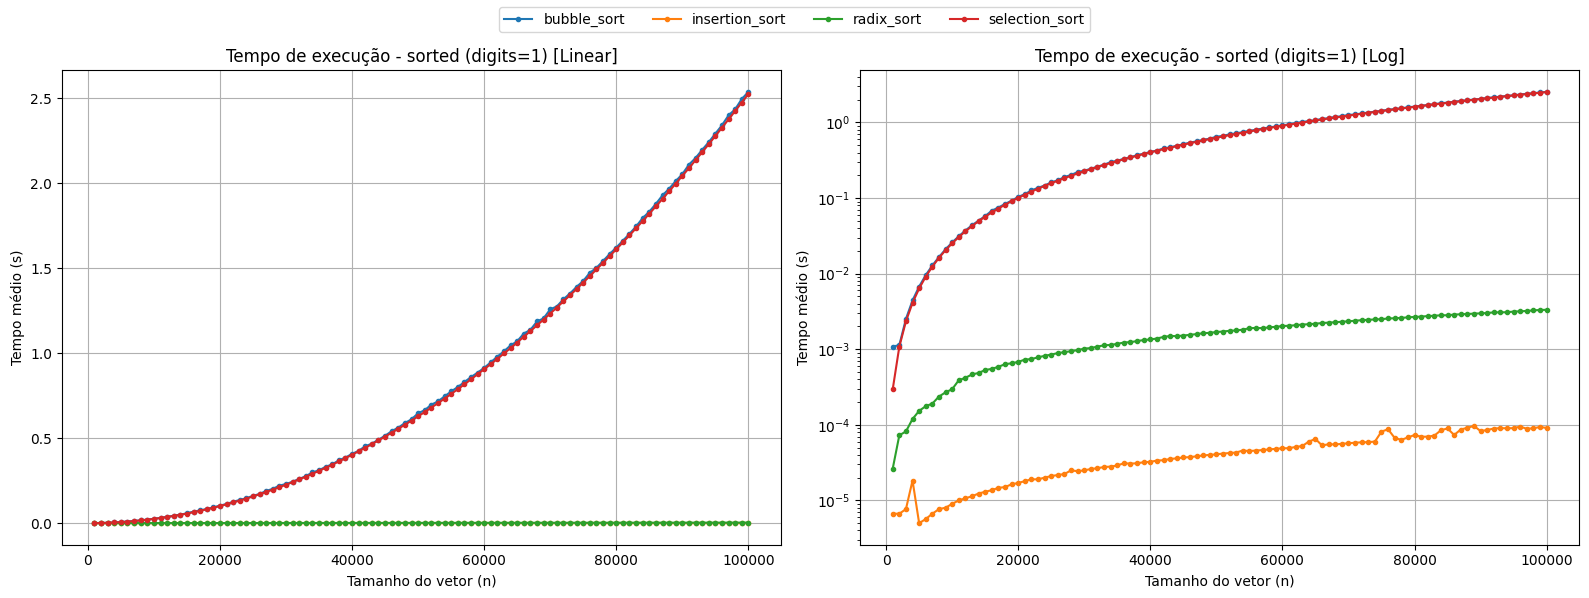

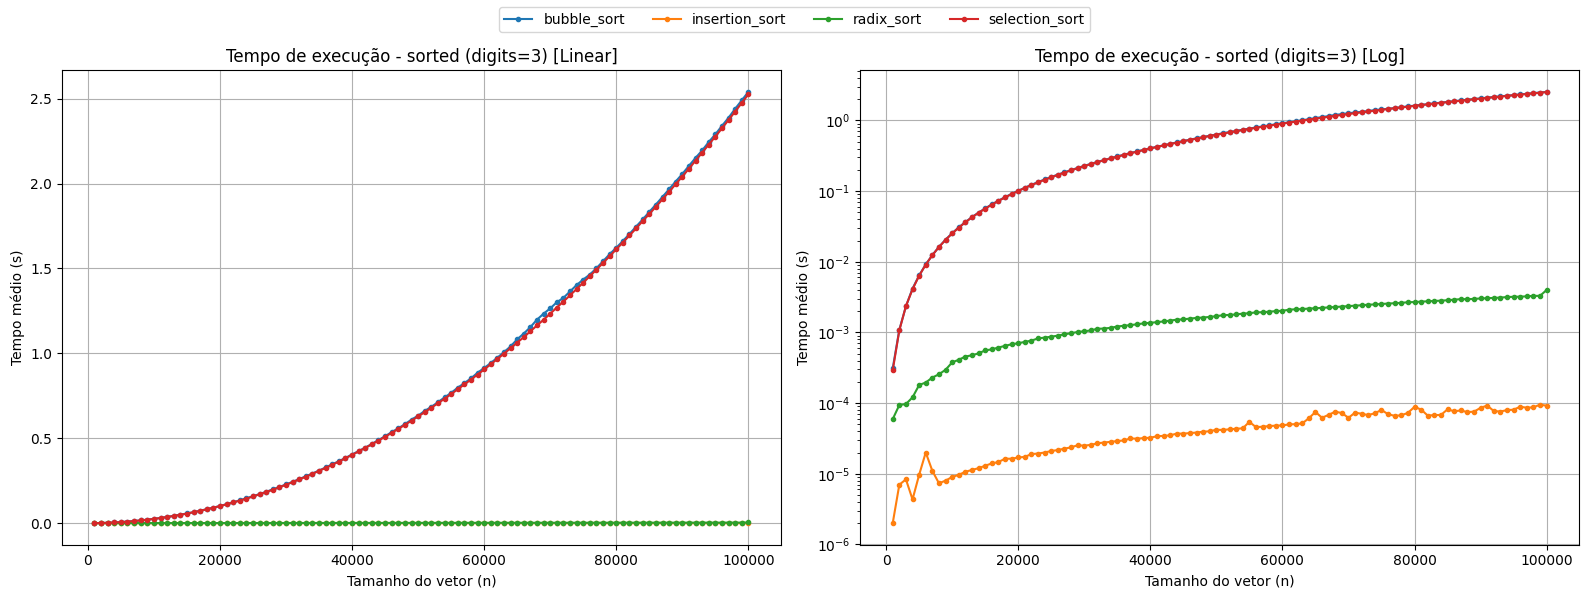

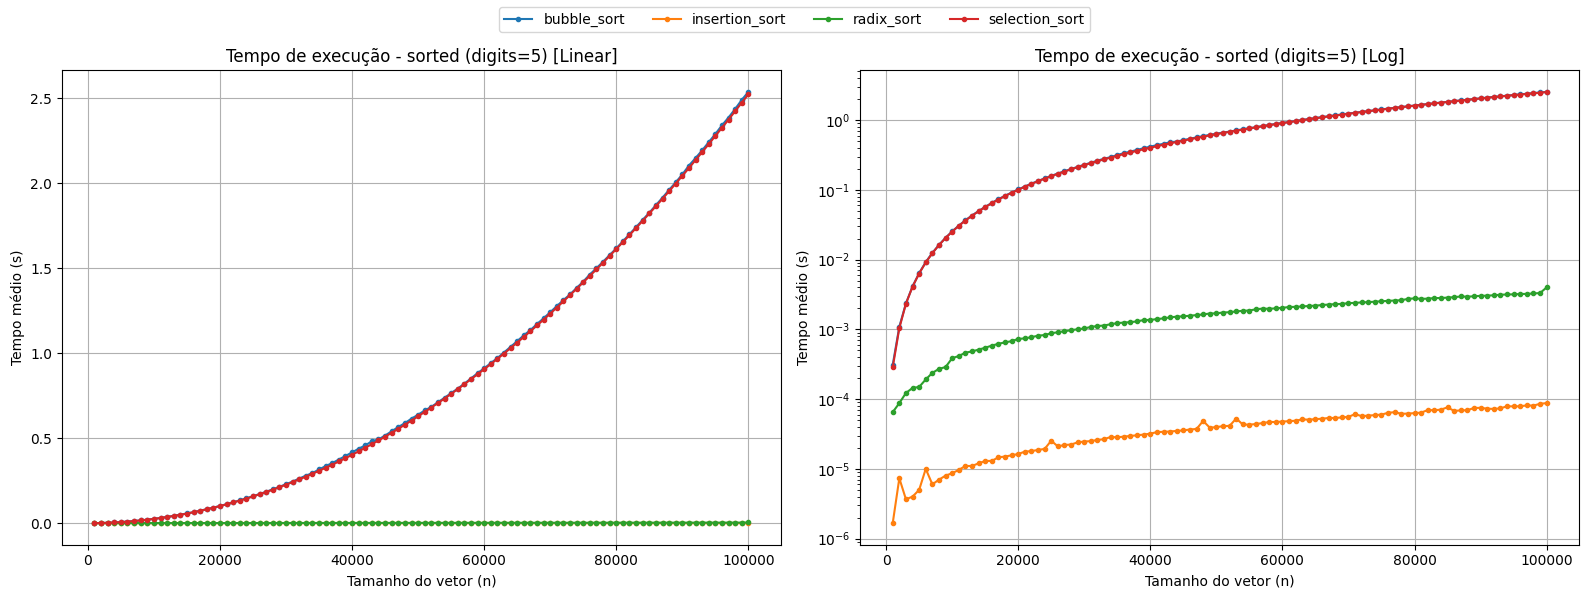

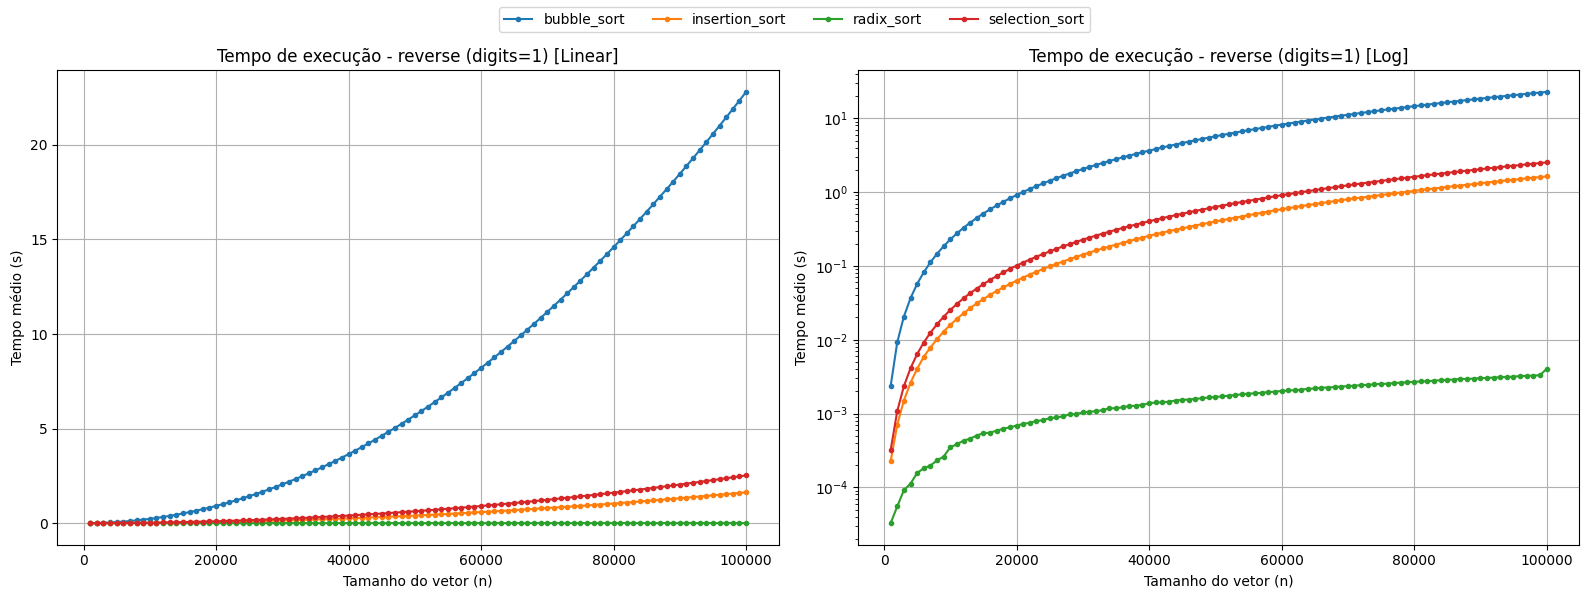

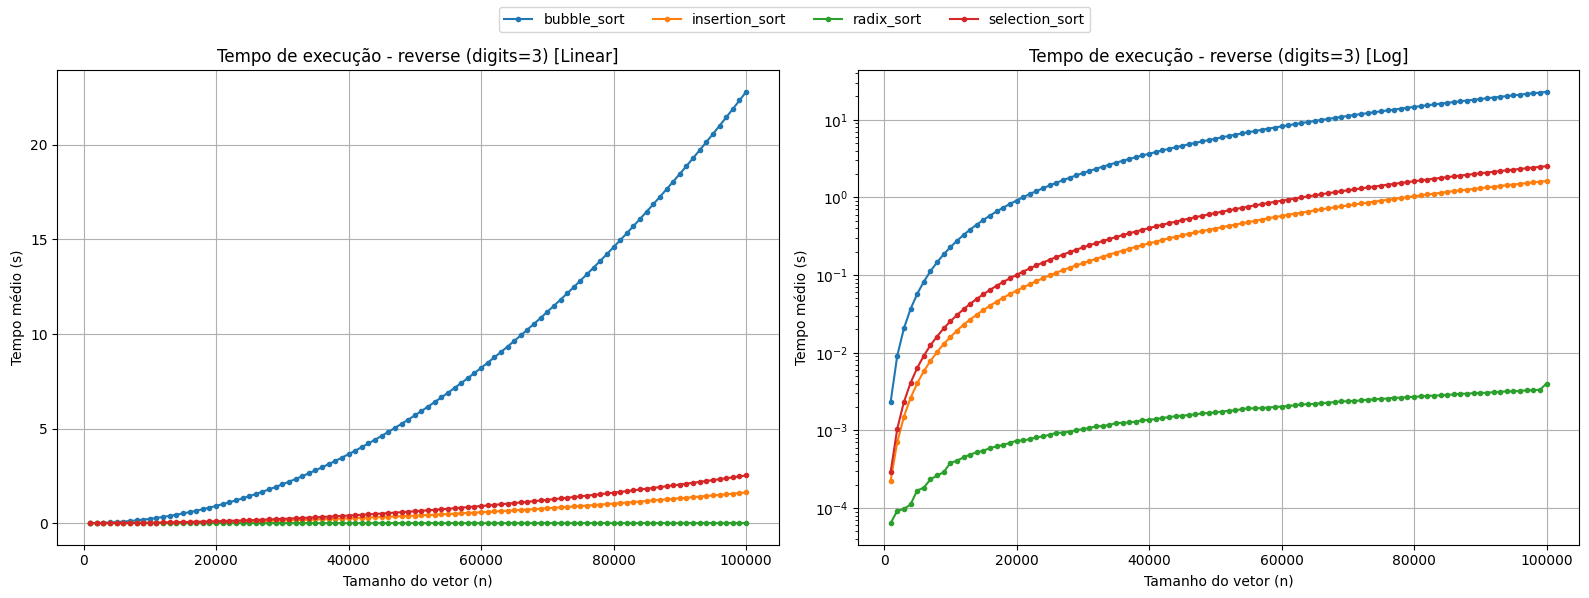

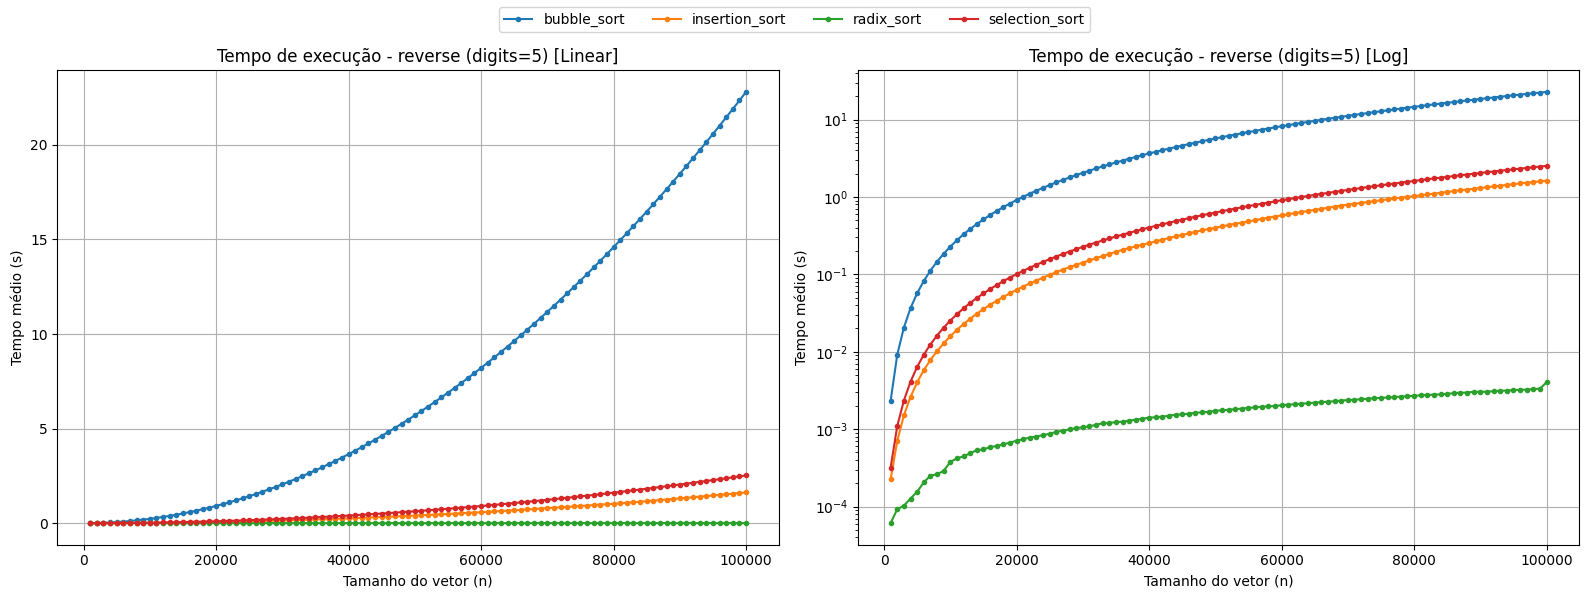

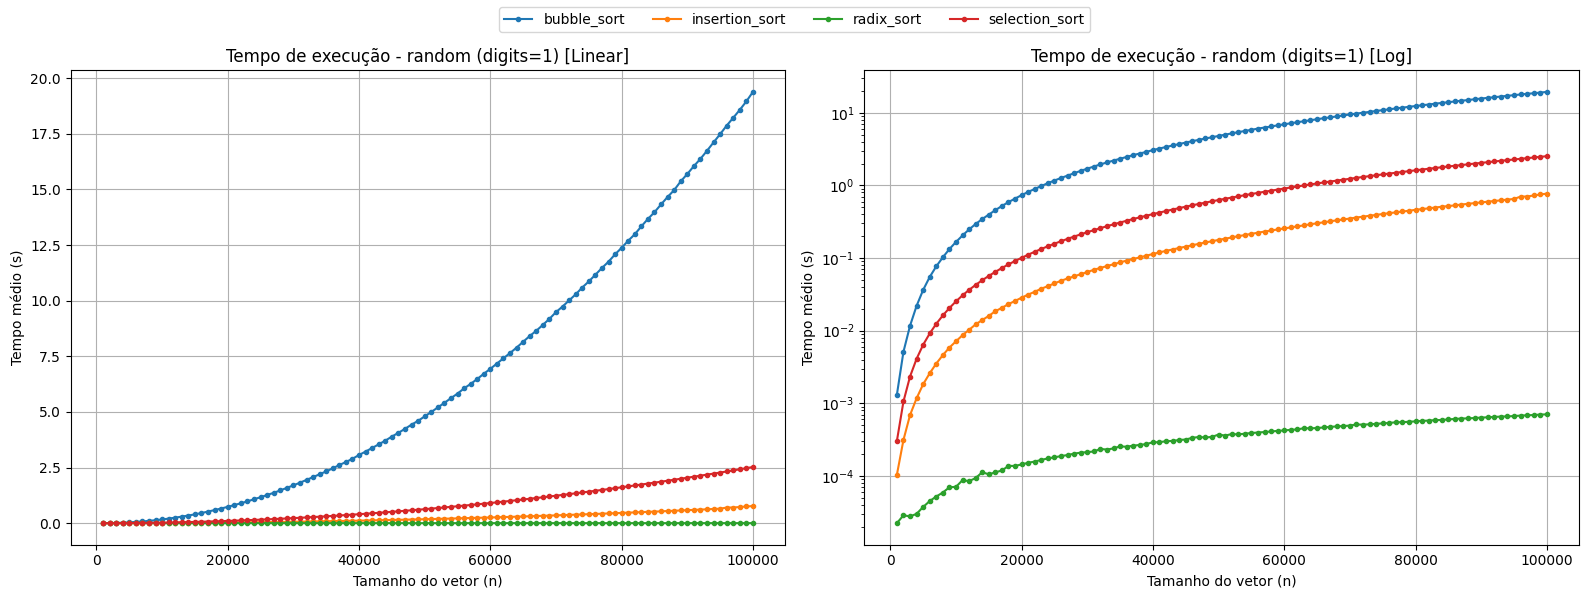

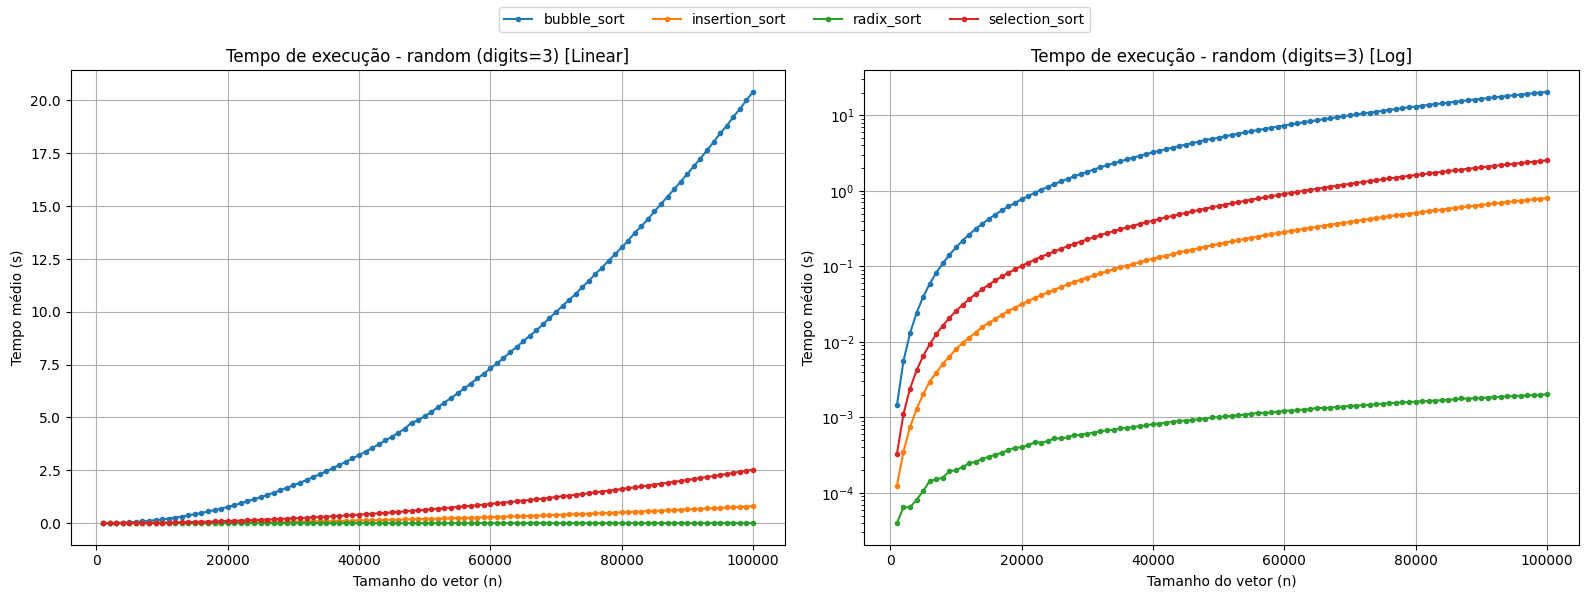

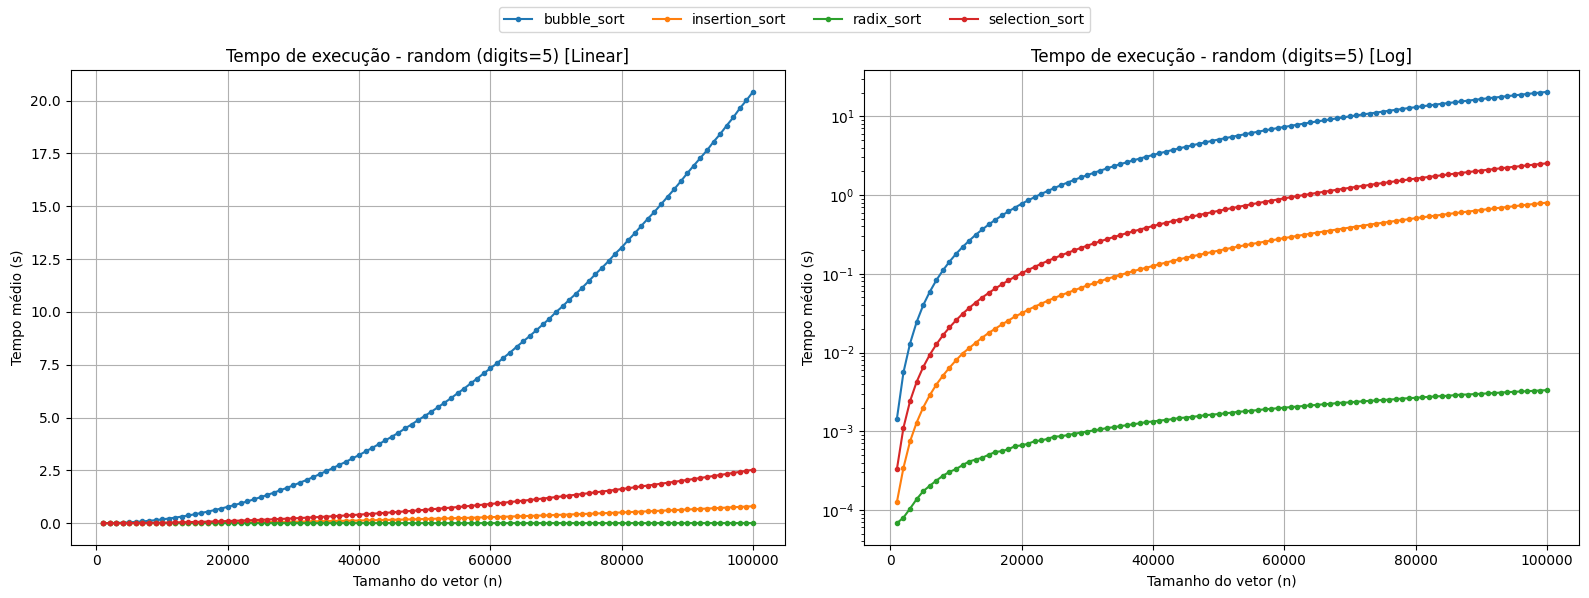

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

scenarios = ["sorted", "reverse", "random"]
dfs = [pd.read_csv(f"{sc}.csv") for sc in scenarios]
data = pd.concat(dfs, ignore_index=True)

grouped = data.groupby(
    ["algorithm", "scenario", "size", "digits"], as_index=False
).agg({
    "execution_time": "mean",
    "memory_used_bytes": "mean"
})

for scenario in scenarios:
    df_scenario = grouped[grouped["scenario"] == scenario]

    for digits in sorted(df_scenario["digits"].unique()):
        df_d = df_scenario[df_scenario["digits"] == digits]
        min_max_size = df_d.groupby("algorithm")["size"].max().min()
        df_d = df_d[df_d["size"] <= min_max_size]

        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        for algo in df_d["algorithm"].unique():
            df_algo = df_d[df_d["algorithm"] == algo]
            axes[0].plot(df_algo["size"], df_algo["execution_time"], marker="o", markersize=3, label=algo)
            axes[1].plot(df_algo["size"], df_algo["execution_time"], marker="o", markersize=3, label=algo)

        axes[0].set_title(f"Tempo de execução - {scenario} (digits={digits}) [Linear]")
        axes[0].set_xlabel("Tamanho do vetor (n)")
        axes[0].set_ylabel("Tempo médio (s)")
        axes[0].grid(True)

        axes[1].set_title(f"Tempo de execução - {scenario} (digits={digits}) [Log]")
        axes[1].set_xlabel("Tamanho do vetor (n)")
        axes[1].set_ylabel("Tempo médio (s)")
        axes[1].set_yscale("log")
        axes[1].grid(True)

        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc="upper center", ncol=len(handles))

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


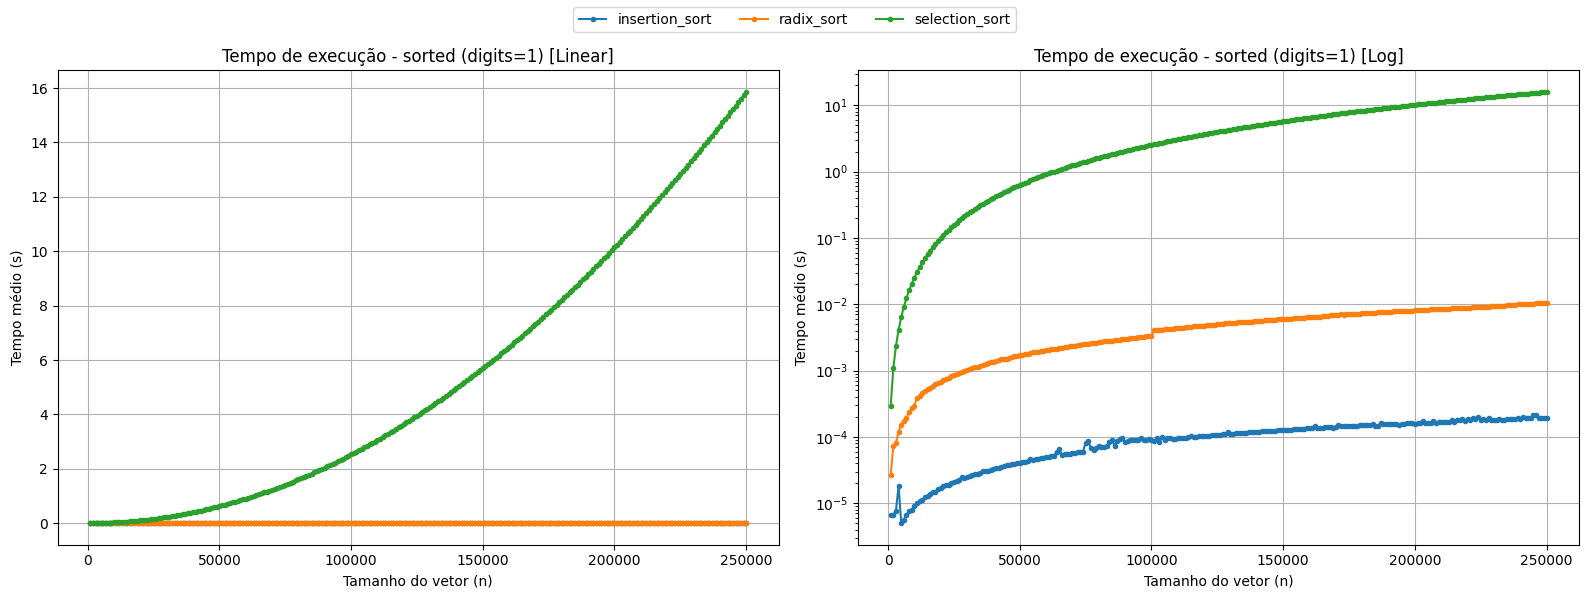

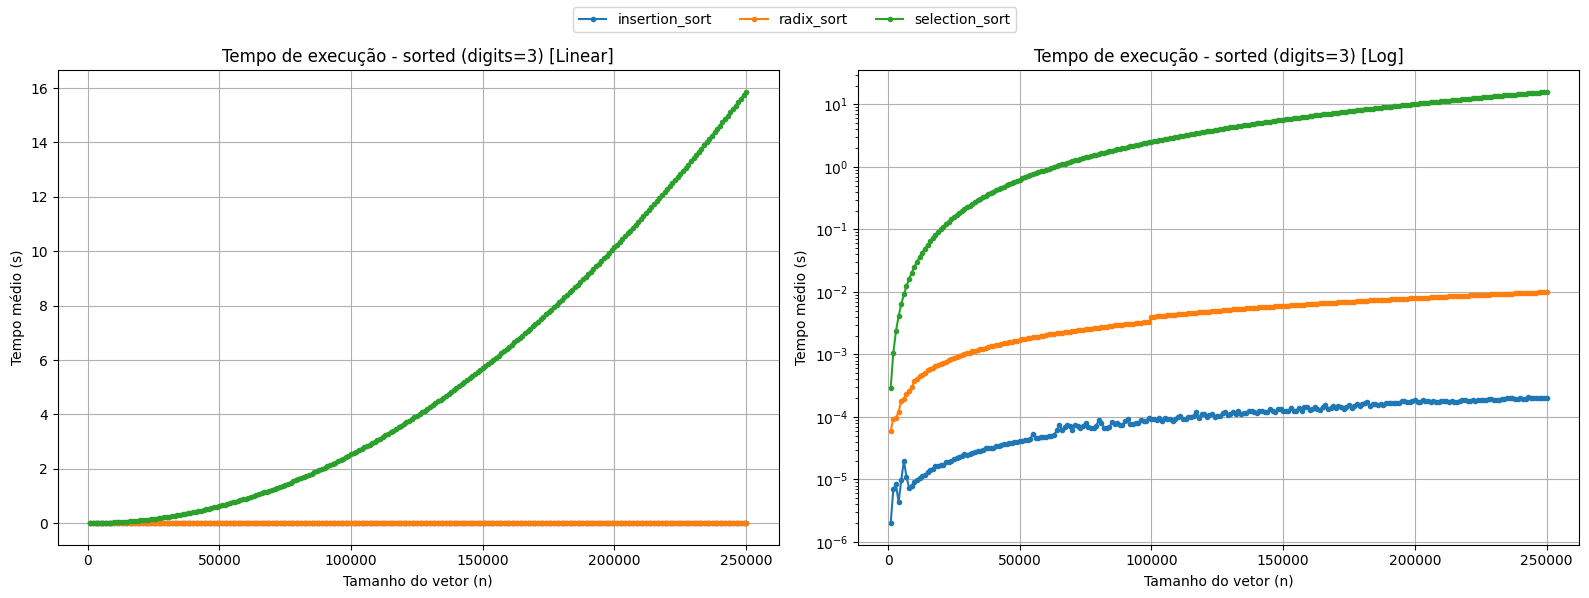

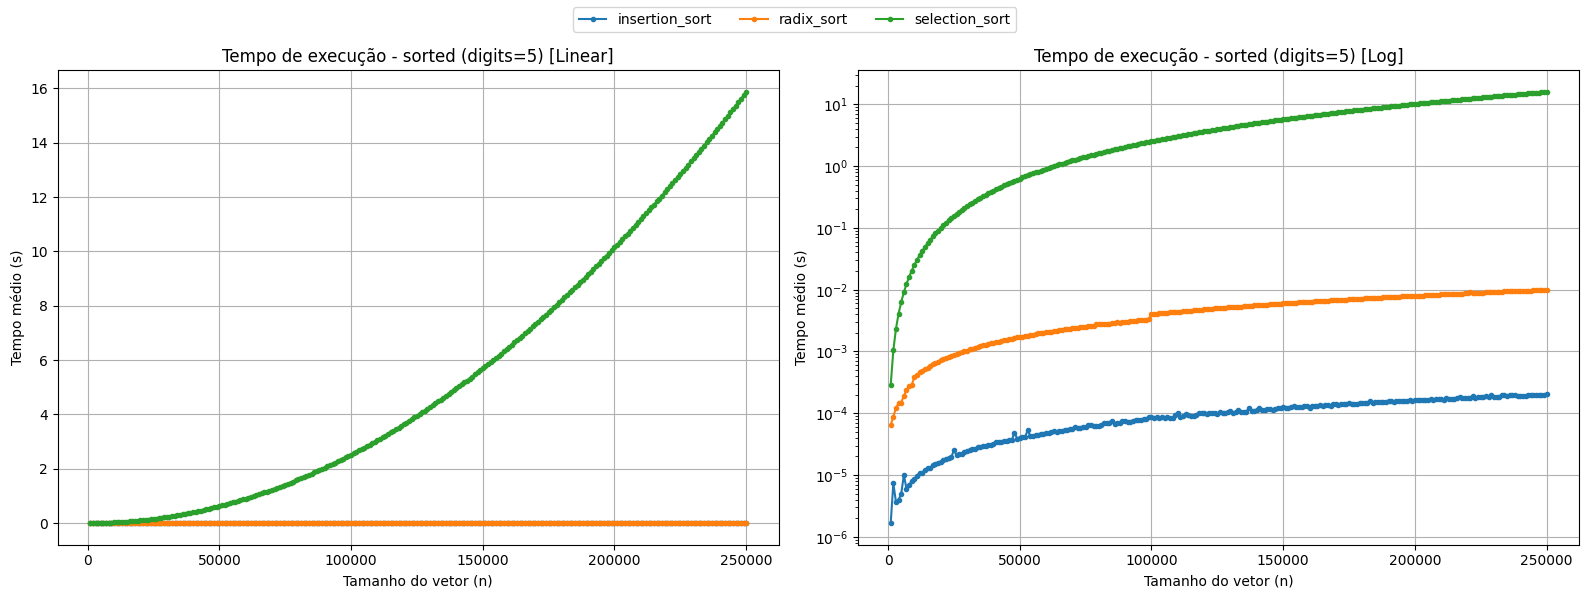

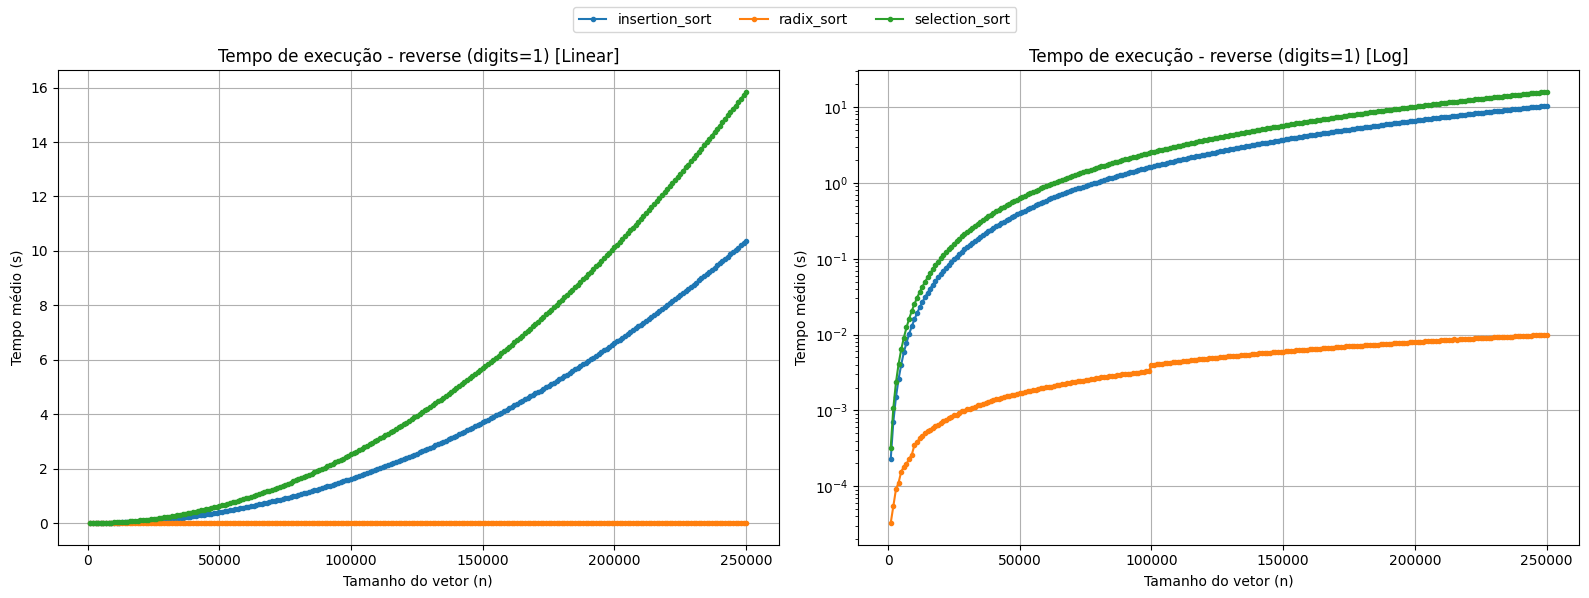

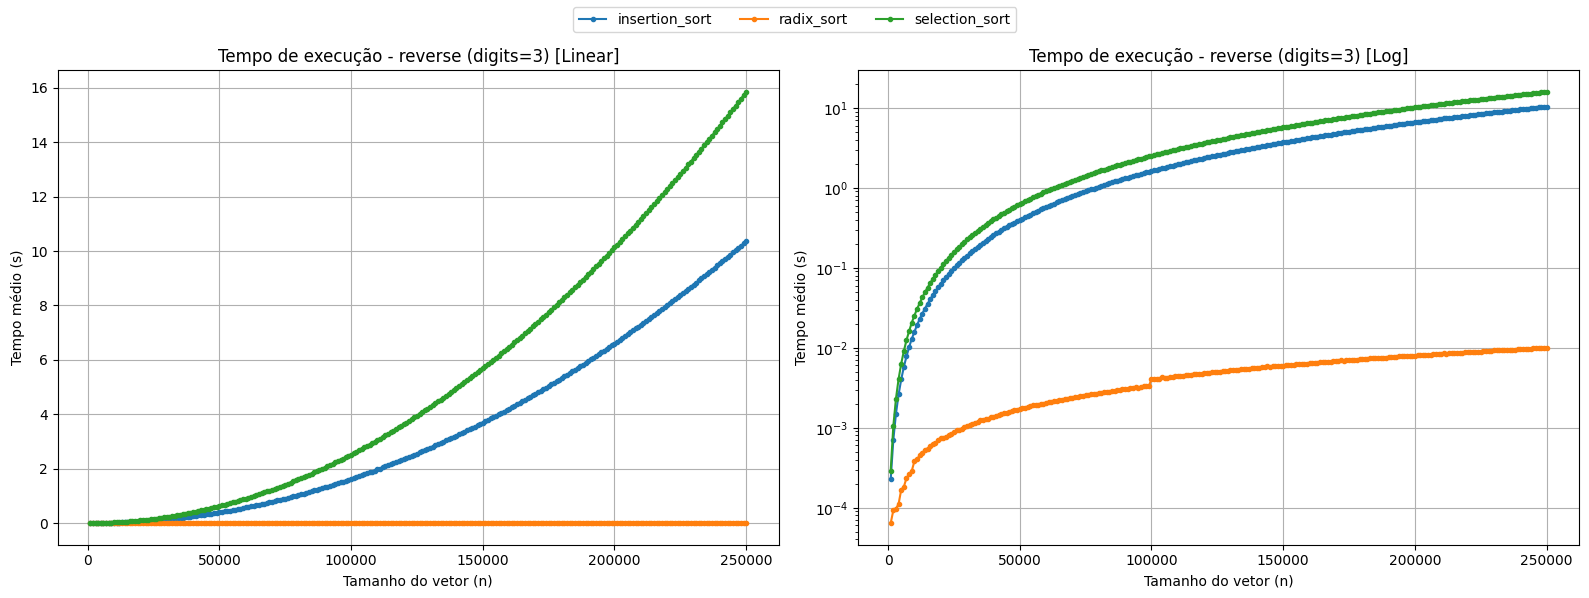

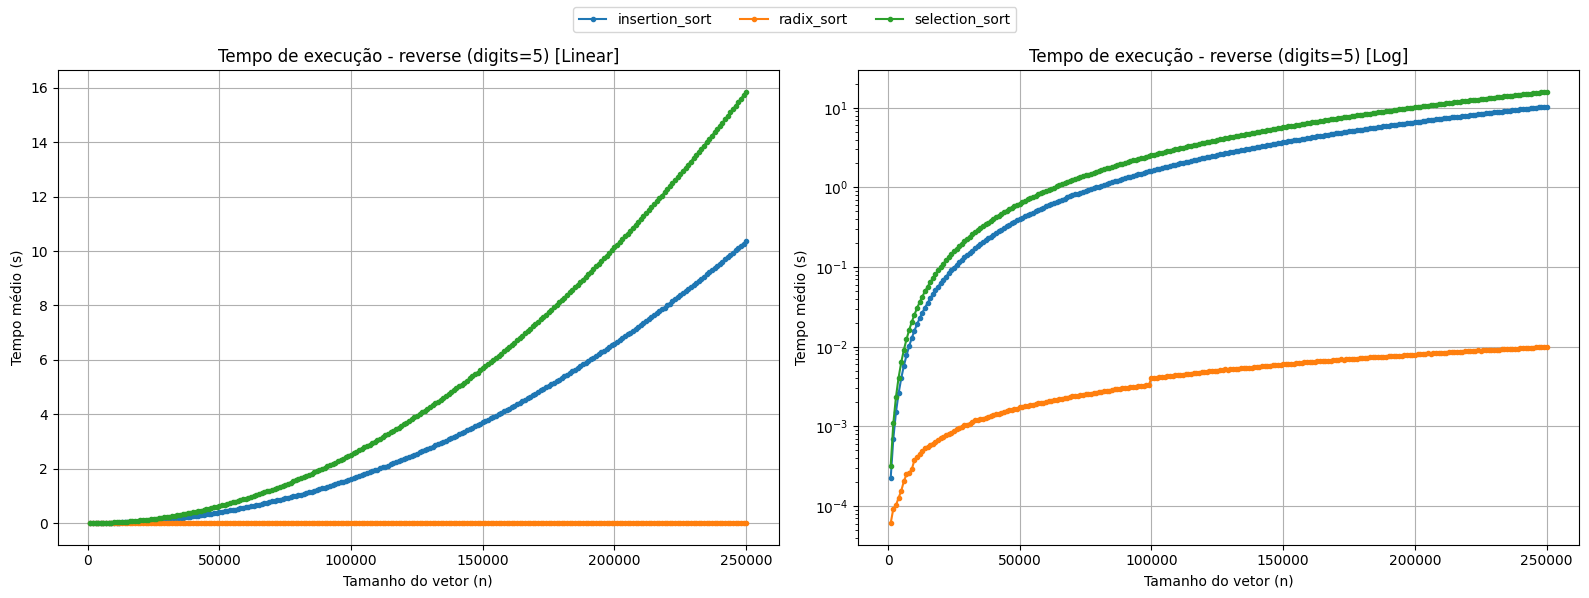

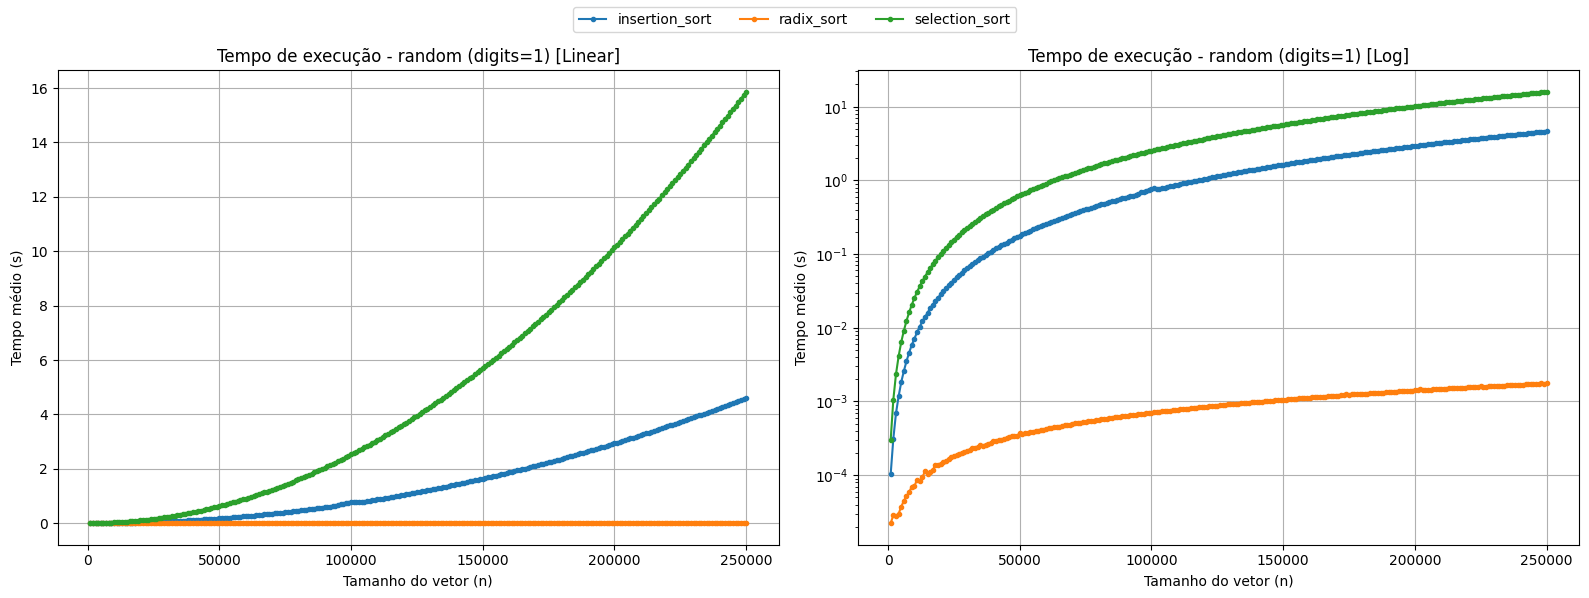

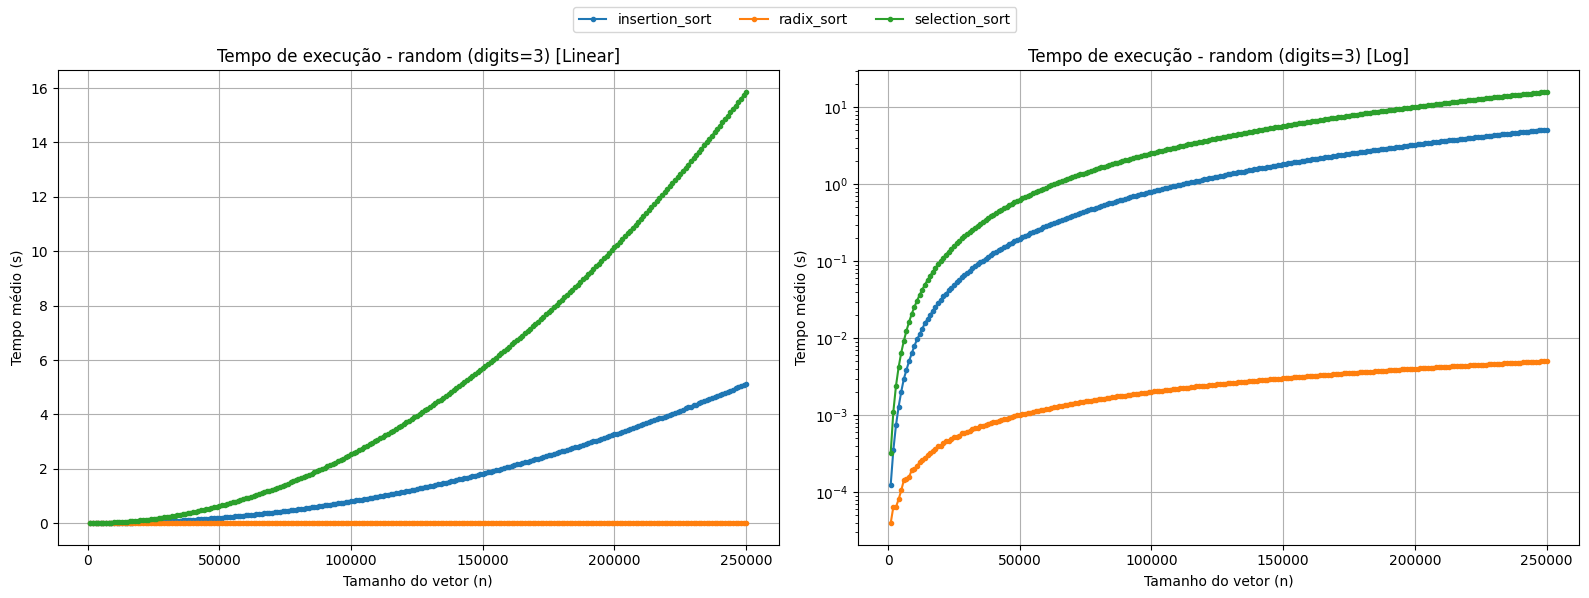

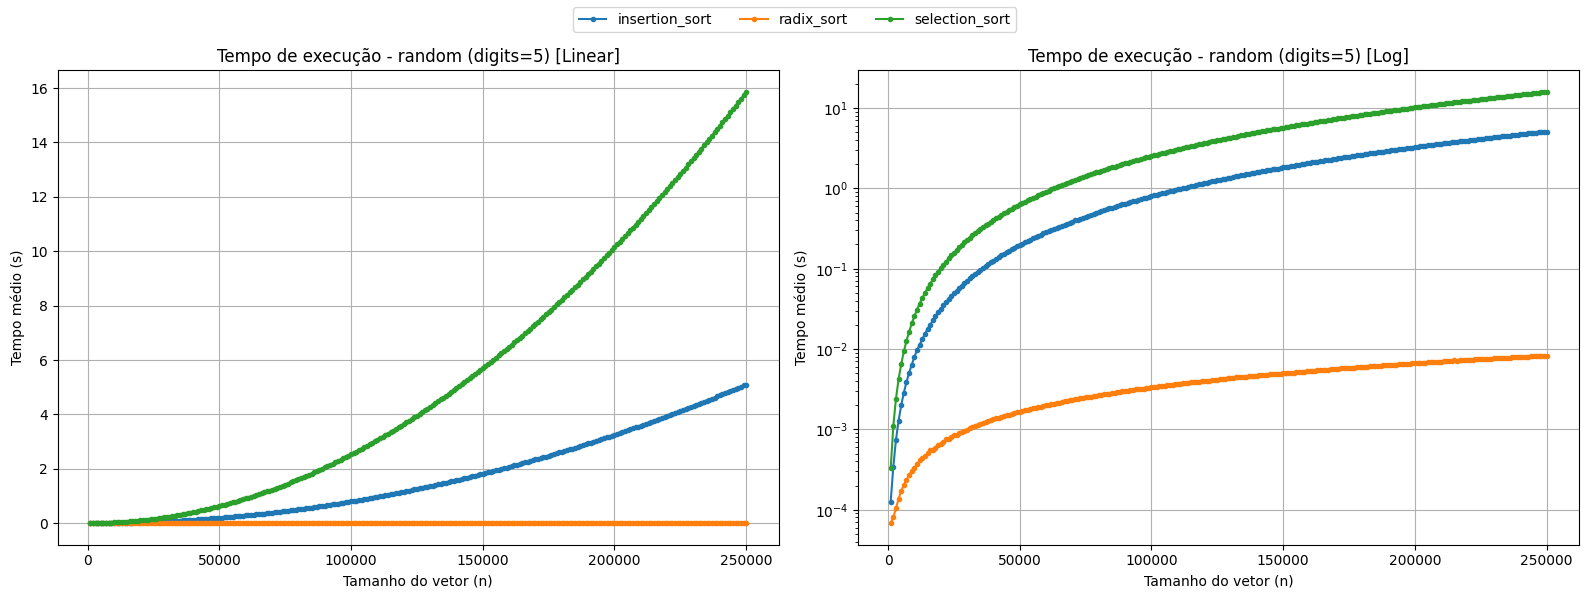

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

scenarios = ["sorted", "reverse", "random"]
dfs = [pd.read_csv(f"{sc}.csv") for sc in scenarios]
data = pd.concat(dfs, ignore_index=True)

grouped = data.groupby(
    ["algorithm", "scenario", "size", "digits"], as_index=False
).agg({
    "execution_time": "mean",
    "memory_used_bytes": "mean"
})

grouped = grouped[~grouped["algorithm"].str.contains("bubble", case=False)]

for scenario in scenarios:
    df_scenario = grouped[grouped["scenario"] == scenario]

    for digits in sorted(df_scenario["digits"].unique()):
        df_d = df_scenario[df_scenario["digits"] == digits]

        min_max_size = df_d.groupby("algorithm")["size"].max().min()
        df_d = df_d[df_d["size"] <= min_max_size]

        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        for algo in df_d["algorithm"].unique():
            df_algo = df_d[df_d["algorithm"] == algo]
            axes[0].plot(df_algo["size"], df_algo["execution_time"],
                         marker="o", markersize=3, label=algo)
            axes[1].plot(df_algo["size"], df_algo["execution_time"],
                         marker="o", markersize=3, label=algo)

        axes[0].set_title(f"Tempo de execução - {scenario} (digits={digits}) [Linear]")
        axes[0].set_xlabel("Tamanho do vetor (n)")
        axes[0].set_ylabel("Tempo médio (s)")
        axes[0].grid(True)

        axes[1].set_title(f"Tempo de execução - {scenario} (digits={digits}) [Log]")
        axes[1].set_xlabel("Tamanho do vetor (n)")
        axes[1].set_ylabel("Tempo médio (s)")
        axes[1].set_yscale("log")
        axes[1].grid(True)

        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc="upper center", ncol=len(handles))

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

Cenário: sorted
  Memória mínima (MB): 0.0039
  Memória máxima (MB): 3.8147



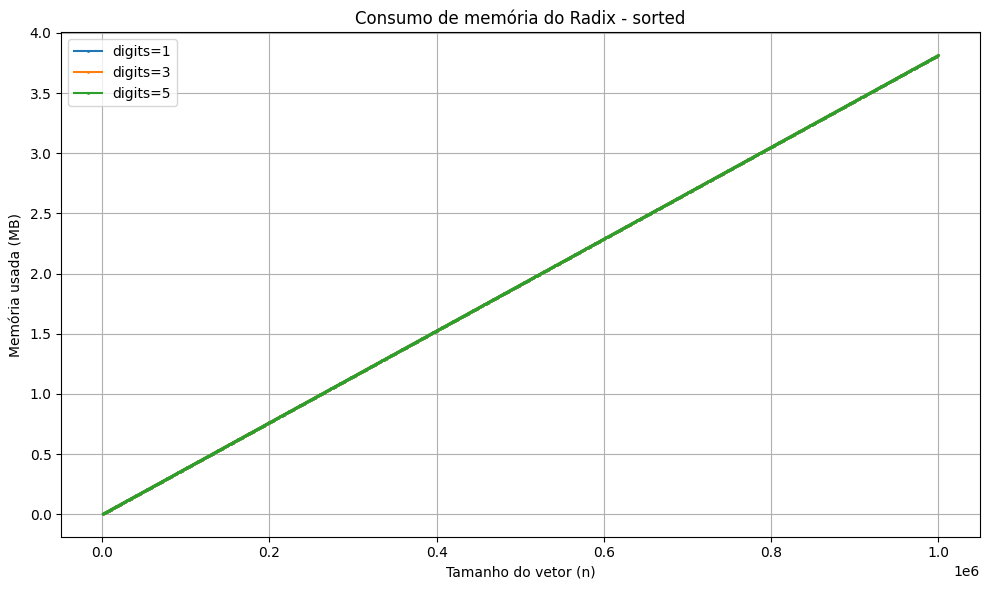

Cenário: reverse
  Memória mínima (MB): 0.0039
  Memória máxima (MB): 3.8147



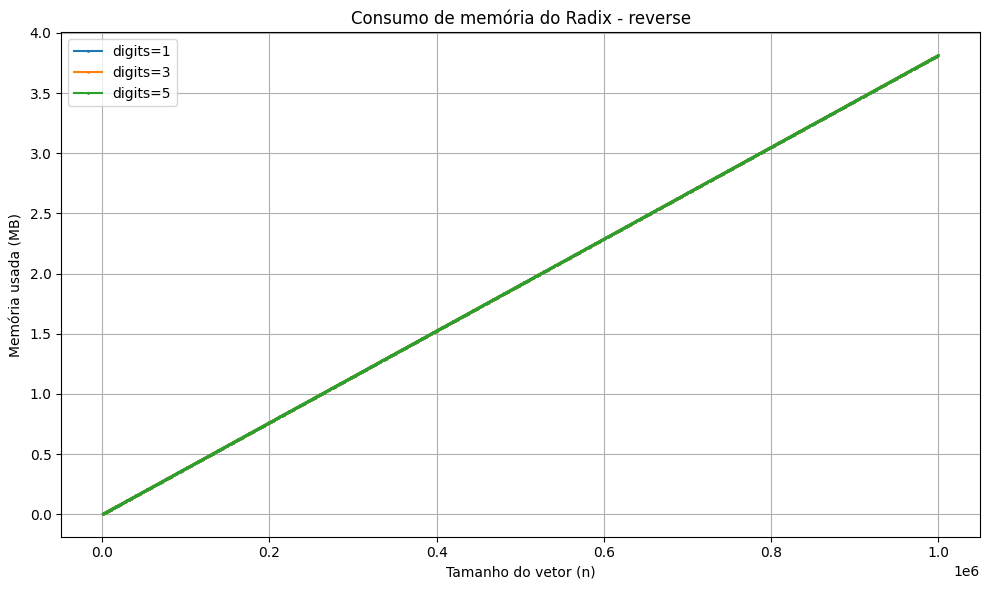

Cenário: random
  Memória mínima (MB): 0.0039
  Memória máxima (MB): 3.8147



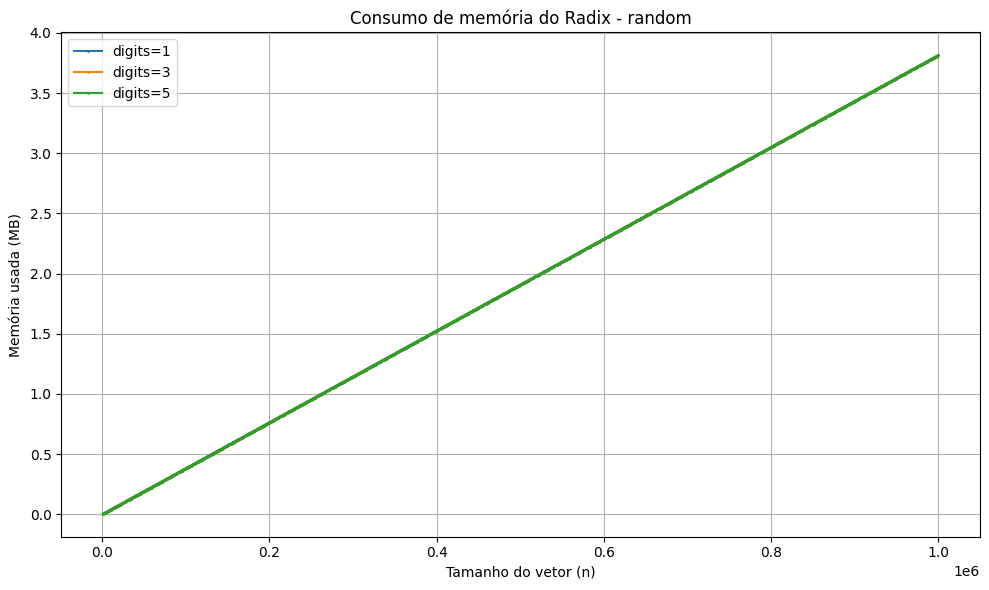

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

scenarios = ["sorted", "reverse", "random"]
dfs = [pd.read_csv(f"{sc}.csv") for sc in scenarios]
data = pd.concat(dfs, ignore_index=True)

grouped = data.groupby(
    ["algorithm", "scenario", "size", "digits"], as_index=False
).agg({
    "memory_used_bytes": "mean"
})

grouped["memory_MB"] = grouped["memory_used_bytes"] / (1024 * 1024)

for scenario in scenarios:
    df_scenario = grouped[(grouped["scenario"] == scenario) & (grouped["algorithm"] == "radix_sort")]

    print(f"Cenário: {scenario}")
    print(f"  Memória mínima (MB): {df_scenario['memory_MB'].min():.4f}")
    print(f"  Memória máxima (MB): {df_scenario['memory_MB'].max():.4f}\n")

    plt.figure(figsize=(10, 6))

    for digits in sorted(df_scenario["digits"].unique()):
        df_d = df_scenario[df_scenario["digits"] == digits]
        plt.plot(
            df_d["size"],
            df_d["memory_MB"],
            marker="o",
            markersize=1,
            linewidth=1.5,
            label=f"digits={digits}"
        )

    plt.title(f"Consumo de memória do Radix - {scenario}")
    plt.xlabel("Tamanho do vetor (n)")
    plt.ylabel("Memória usada (MB)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
